In [1]:
cards = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
suits = ["Clubs", "Diamonds", "Hearts", "Spades"]


In [10]:
all_cards = [(card, suit) for card in cards for suit in suits]

In [32]:
import random
from matplotlib import pyplot as plt

In [19]:
def do_cycle(player_count):
    all_cards_copy = all_cards.copy()
    players = []

    for i in range(player_count):
        player = []
        for j in range(2):
            card = random.choice(all_cards_copy)
            player.append(card)
            all_cards_copy.remove(card)
        players.append(player)

    community = []

    def burn():
        card_to_burn = random.choice(all_cards_copy)
        all_cards_copy.remove(card_to_burn)

    def draw(count):
        for i in range(count):
            card = random.choice(all_cards_copy)
            community.append(card)
            all_cards_copy.remove(card)

    burn()
    draw(3)
    burn()
    draw(1)
    burn()
    draw(1)

    return (community, players)

In [20]:
do_cycle(1)

([('4', 'Diamonds'),
  ('9', 'Diamonds'),
  ('Q', 'Spades'),
  ('7', 'Hearts'),
  ('10', 'Spades')],
 [[('9', 'Hearts'), ('3', 'Clubs')]])

In [26]:
def is_flush(community, players):
    community_suit_count = {}

    for card in community:
        if card[1] not in community_suit_count:
            community_suit_count[card[1]] = 0

        community_suit_count[card[1]] += 1

    for player in players:
        player_suit_count = community_suit_count.copy()
        for card in player:
            if card[1] not in player_suit_count:
                player_suit_count[card[1]] = 0

            player_suit_count[card[1]] += 1

            if player_suit_count[card[1]] >= 5:
                return True

    return False

In [34]:
total_games = 10000

def run_probz(player_count):
    games_with_flush = 0

    for i in range(total_games):
        community, players = do_cycle(player_count)

        if is_flush(community, players):
            games_with_flush += 1

    return games_with_flush / total_games

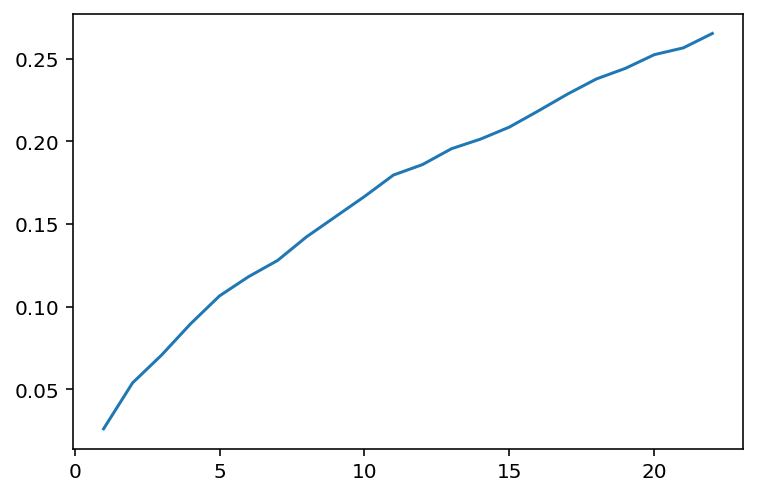

In [35]:
max_players = 22
probz = []

for i in range(max_players):
    probz.append(run_probz(i + 1))

plt.plot(range(1, max_players + 1), probz)
plt.show()